In [18]:
import librosa
#import librosa.display
import numpy as np
#import matplotlib.pyplot as plt
import tensorflow as tf
#from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [19]:
import os

In [20]:
actorlist = os.listdir('Audio')

In [21]:
mydir = 'Audio/'

In [22]:
mylist = os.listdir(mydir)

In [23]:
print(mylist[2])

Actor_18


In [24]:
actorlist.sort()

In [25]:
print(actorlist)

['.DS_Store', 'Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [26]:
feeling_list=[]
mydir = 'Audio/'
for actor in actorlist:
    try:
        mylist = os.listdir(mydir+actor)
        mylist.sort()
        for item in mylist:

            if item[6:-16]=='01' and int(item[18:-4])%2==0:
                feeling_list.append('female_neutral')
            elif item[6:-16]=='01' and int(item[18:-4])%2==1:
                feeling_list.append('male_neutral')

            if item[6:-16]=='02' and int(item[18:-4])%2==0:
                feeling_list.append('female_calm')
            elif item[6:-16]=='02' and int(item[18:-4])%2==1:
                feeling_list.append('male_calm')

            elif item[6:-16]=='03' and int(item[18:-4])%2==0:
                feeling_list.append('female_happy')
            elif item[6:-16]=='03' and int(item[18:-4])%2==1:
                feeling_list.append('male_happy')

            elif item[6:-16]=='04' and int(item[18:-4])%2==0:
                feeling_list.append('female_sad')
            elif item[6:-16]=='04' and int(item[18:-4])%2==1:
                feeling_list.append('male_sad')

            elif item[6:-16]=='05' and int(item[18:-4])%2==0:
                feeling_list.append('female_angry')
            elif item[6:-16]=='05' and int(item[18:-4])%2==1:
                feeling_list.append('male_angry')

            elif item[6:-16]=='06' and int(item[18:-4])%2==0:
                feeling_list.append('female_fearful')
            elif item[6:-16]=='06' and int(item[18:-4])%2==1:
                feeling_list.append('male_fearful')

            if item[6:-16]=='07' and int(item[18:-4])%2==0:
                feeling_list.append('female_disgust')
            elif item[6:-16]=='07' and int(item[18:-4])%2==1:
                feeling_list.append('male_disgust')

            if item[6:-16]=='08' and int(item[18:-4])%2==0:
                feeling_list.append('female_surpise')
            elif item[6:-16]=='08' and int(item[18:-4])%2==1:
                feeling_list.append('male_surprise')
                
    except: pass


In [27]:
import pandas as pd
labels = pd.DataFrame(feeling_list)

In [28]:
labels

,0
0,male_neutral
1,male_neutral
2,male_neutral
3,male_neutral
4,male_calm
5,male_calm
6,male_calm
7,male_calm
8,male_calm
9,male_calm


In [29]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,actor in enumerate(actorlist):
    print(index, actor)
    try:
        recordinglist = os.listdir('Audio/'+actor)
        for index, recording in enumerate(recordinglist):
            X, sample_rate = librosa.load('Audio/'+actor+'/'+recording, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
            sample_rate = np.array(sample_rate)
            mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                                sr=sample_rate, 
                                                n_mfcc=13),
                            axis=0)
            feature = mfccs
            df.loc[bookmark] = [feature]
            bookmark=bookmark+1
    except: pass

0 .DS_Store
1 Actor_01
2 Actor_02
3 Actor_03
4 Actor_04
5 Actor_05
6 Actor_06
7 Actor_07
8 Actor_08
9 Actor_09
10 Actor_10
11 Actor_11
12 Actor_12
13 Actor_13
14 Actor_14
15 Actor_15
16 Actor_16
17 Actor_17
18 Actor_18
19 Actor_19
20 Actor_20
21 Actor_21
22 Actor_22
23 Actor_23
24 Actor_24


In [30]:
featuresDf = pd.DataFrame(df['feature'].values.tolist())

In [31]:
featuresDf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,...,-61.862374,-61.862374,-61.761406,-60.348411,-60.160468,-61.384289,-60.519129,-61.495963,-61.862374,-60.531564
1,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001
2,-55.663086,-56.170336,-56.157848,-54.663471,-55.166778,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,...,-55.155076,-56.156944,-56.156944,-56.156944,-55.844215,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944
3,-63.523530,-63.523530,-63.523530,-63.523530,-63.523530,-63.377373,-61.595853,-63.160227,-63.523530,-63.523530,...,-39.336517,-39.847823,-40.466040,-40.448086,-42.883065,-43.367558,-46.280296,-48.273818,-49.745182,-50.472916
4,-54.985143,-54.914563,-54.937813,-56.227640,-56.685268,-57.022505,-58.089938,-58.376127,-58.420398,-56.623606,...,-41.046524,-42.297510,-41.002176,-41.728109,-41.608780,-43.741884,-45.259488,-44.909683,-44.988356,-44.630824
5,-67.736151,-67.778018,-66.746144,-65.957883,-67.736151,-67.736151,-67.736151,-67.258683,-67.736151,-67.736151,...,-61.192877,-61.116259,-63.291237,-65.844225,-65.121000,-59.515303,-59.591485,-66.712170,-67.736151,-67.736151
6,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,...,-55.407579,-53.844575,-54.260574,-55.809029,-54.627146,-53.186850,-53.998237,-53.535159,-57.203741,-59.989199
7,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,...,-27.840106,-27.892961,-29.425555,-31.255728,-34.011845,-34.322584,-33.564934,-36.074428,-37.658693,-38.917999
8,-60.369038,-60.083715,-60.978925,-60.952456,-60.982486,-60.983948,-60.981255,-60.981255,-60.981255,-60.249618,...,-48.786174,-49.848358,-49.632920,-55.102587,-55.481730,-52.952234,-51.401589,-54.072970,-52.639566,-52.664178
9,-73.841370,-73.841370,-73.841370,-73.719655,-73.841370,-73.841370,-73.841370,-73.303635,-72.806811,-73.841370,...,-51.629344,-50.568866,-53.505840,-54.222252,-51.545521,-52.573785,-54.786292,-56.344280,-57.508212,-56.577322


In [32]:
labeledDf = pd.concat([featuresDf, labels], axis=1)

In [33]:
labeledDf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,...,-61.862374,-61.761406,-60.348411,-60.160468,-61.384289,-60.519129,-61.495963,-61.862374,-60.531564,male_neutral
1,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,male_neutral
2,-55.663086,-56.170336,-56.157848,-54.663471,-55.166778,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,...,-56.156944,-56.156944,-56.156944,-55.844215,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,male_neutral
3,-63.523530,-63.523530,-63.523530,-63.523530,-63.523530,-63.377373,-61.595853,-63.160227,-63.523530,-63.523530,...,-39.847823,-40.466040,-40.448086,-42.883065,-43.367558,-46.280296,-48.273818,-49.745182,-50.472916,male_neutral
4,-54.985143,-54.914563,-54.937813,-56.227640,-56.685268,-57.022505,-58.089938,-58.376127,-58.420398,-56.623606,...,-42.297510,-41.002176,-41.728109,-41.608780,-43.741884,-45.259488,-44.909683,-44.988356,-44.630824,male_calm
5,-67.736151,-67.778018,-66.746144,-65.957883,-67.736151,-67.736151,-67.736151,-67.258683,-67.736151,-67.736151,...,-61.116259,-63.291237,-65.844225,-65.121000,-59.515303,-59.591485,-66.712170,-67.736151,-67.736151,male_calm
6,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,...,-53.844575,-54.260574,-55.809029,-54.627146,-53.186850,-53.998237,-53.535159,-57.203741,-59.989199,male_calm
7,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,...,-27.892961,-29.425555,-31.255728,-34.011845,-34.322584,-33.564934,-36.074428,-37.658693,-38.917999,male_calm
8,-60.369038,-60.083715,-60.978925,-60.952456,-60.982486,-60.983948,-60.981255,-60.981255,-60.981255,-60.249618,...,-49.848358,-49.632920,-55.102587,-55.481730,-52.952234,-51.401589,-54.072970,-52.639566,-52.664178,male_calm
9,-73.841370,-73.841370,-73.841370,-73.719655,-73.841370,-73.841370,-73.841370,-73.303635,-72.806811,-73.841370,...,-50.568866,-53.505840,-54.222252,-51.545521,-52.573785,-54.786292,-56.344280,-57.508212,-56.577322,male_calm


In [34]:
named = labeledDf.rename(index=str, columns={"0":"label"})

In [35]:
from sklearn.utils import shuffle
renamed = shuffle(named)


In [36]:
renamed[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1058,-79.309150,-79.309150,-79.309150,-79.309150,-79.309150,-79.309150,-79.309150,-79.309150,-79.309150,-79.309150,...,-68.866125,-70.879400,-73.272181,-67.424679,-65.619448,-63.118954,-63.787244,-66.494020,-66.106942,female_surpise
803,-64.247620,-64.373116,-63.817062,-60.828506,-58.402493,-51.610943,-51.796620,-52.992585,-54.142099,-52.943971,...,-47.849436,-48.964547,-48.379615,-47.041026,-46.480041,-46.190387,-46.501645,-46.433923,-47.593557,male_surprise
53,-64.894397,-64.894397,-64.894397,-64.894397,-64.894397,-64.894397,-64.894397,-64.894397,-64.894397,-64.894397,...,-55.871372,-52.304884,-53.291198,-59.366247,-58.611711,-56.177619,-56.868883,-60.205536,-62.329517,female_calm
80,-55.217309,-57.142352,-56.979509,-56.664986,-57.439550,-57.614163,-57.124357,-56.951166,-56.631125,-56.283090,...,-53.750141,-56.681749,-56.086068,-57.121125,-57.198056,-57.852790,-57.664425,-55.603506,-54.206286,female_fearful
369,-55.309755,-53.135627,-53.411575,-53.746281,-52.089333,-52.538318,-52.818341,-52.520157,-54.157408,-56.611049,...,-52.228938,-52.653944,-51.813917,-52.422211,-53.317482,-51.357122,-52.184839,-53.723655,-51.837224,female_happy
67,-61.161481,-61.161481,-61.161481,-61.161481,-61.161481,-61.161481,-61.161481,-61.161481,-61.161481,-61.161481,...,-55.272283,-58.792892,-58.944671,-58.572789,-56.419658,-56.884215,-59.682174,-60.086037,-58.741867,female_sad
222,-39.749325,-39.749325,-39.749325,-39.749325,-39.749325,-39.749325,-39.749325,-39.749325,-39.749325,-39.749325,...,-38.703549,-39.578304,-39.625226,-39.157460,-39.267257,-39.749325,-39.749325,-39.749325,-39.749325,male_sad
1176,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.566388,-51.456360,-51.228733,-51.377650,...,-52.273590,-52.550974,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,male_angry
829,-35.319465,-39.132699,-39.785703,-37.674017,-37.200961,-35.843159,-36.003844,-37.002807,-38.095702,-41.360303,...,-39.295047,-37.979322,-38.666503,-39.226166,-39.982413,-39.395069,-38.948013,-40.996470,-40.479915,female_sad
585,-62.627153,-62.568323,-61.628763,-62.030573,-62.627153,-62.627153,-62.627153,-62.627153,-62.627153,-62.627153,...,-54.196675,-53.794721,-54.912960,-53.278996,-54.207670,-55.128292,-55.759278,-53.931032,-52.580857,female_calm


In [37]:
renamed = renamed.fillna(0)

In [74]:
divider = np.random.rand(len(renamed)) < 0.85
train = renamed[divider]
test = renamed[~divider]

In [75]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
182,-55.895559,-55.895559,-55.895559,-55.895559,-55.895559,-55.895559,-55.895559,-55.895559,-55.895559,-55.895559,...,-55.878993,-55.720305,-55.895559,-53.423616,-54.514522,-56.326328,-55.916817,-55.856798,-54.609526,female_fearful
909,-49.647638,-50.662648,-52.826906,-51.221888,-49.420939,-49.680657,-47.142643,-49.038043,-51.746490,-51.481773,...,-54.452001,-53.523456,-52.629641,-51.865753,-50.824184,-52.774172,-53.081611,-52.079972,-52.391522,male_disgust
730,-70.400550,-70.400550,-70.400550,-70.400550,-69.432192,-67.132271,-66.026492,-65.041883,-64.778713,-65.204933,...,-61.743077,-58.785375,-58.077398,-59.684619,-61.275630,-60.361666,-57.225772,-58.686888,-63.324019,female_fearful
591,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,-43.013786,...,-29.464094,-28.035271,-26.927565,-28.122175,-30.396886,-29.854355,-27.671695,-26.385856,-24.183284,female_calm
423,-61.080895,-61.470583,-61.351923,-59.571079,-59.312108,-59.351803,-62.197510,-61.885155,-59.451596,-61.568372,...,-44.797739,-44.210593,-44.046530,-44.359682,-46.438550,-48.639864,-46.470403,-47.464108,-49.256035,male_calm
1069,-52.000726,-52.000726,-52.000726,-51.157791,-51.038548,-51.565109,-52.000726,-52.000726,-51.692669,-51.630730,...,-45.041480,-46.360539,-47.435754,-45.051733,-45.605298,-45.434120,-45.584861,-44.438182,-43.538648,male_happy
262,-56.335690,-54.906206,-53.692970,-53.523573,-55.157868,-55.398388,-55.014681,-53.006655,-50.264192,-49.289816,...,-55.085740,-51.844803,-53.272320,-55.002000,-49.909913,-48.875654,-49.106418,-49.231347,-50.217761,female_happy
839,-52.565037,-52.565037,-52.565037,-52.565037,-52.565037,-52.565037,-52.565037,-52.565037,-53.494297,-52.640799,...,-46.514663,-47.245842,-49.055834,-51.519685,-51.582134,-50.305982,-51.048231,-52.137047,-51.173593,female_angry
34,-53.913995,-53.856719,-53.552779,-53.879402,-54.017351,-54.070804,-54.128800,-54.258137,-54.262680,-54.137379,...,-41.416883,-41.197624,-45.481135,-47.965396,-49.700518,-52.673831,-52.024993,-51.075670,-52.622621,male_fearful
255,-56.020816,-55.617262,-55.249567,-55.412151,-54.860023,-53.800115,-51.929230,-50.367562,-49.699363,-50.277689,...,-50.861944,-49.661319,-49.058371,-47.725829,-47.595243,-48.072184,-48.019501,-48.827681,-50.340179,female_neutral


In [76]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]


In [77]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


In [78]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/Users/lucaslyon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [80]:
X_train.shape

(1079, 216)

In [81]:
print('Pad sequences')
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

Pad sequences


In [93]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 216, 128)          768       
_________________________________________________________________
activation_22 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 216, 128)          82048     
_________________________________________________________________
activation_23 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 27, 128)           82048     
__________

In [91]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [92]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=1000, validation_data=(x_testcnn, y_test))

ValueError: Error when checking target: expected activation_28 to have shape (10,) but got array with shape (16,)

In [ ]:
cnnhistory

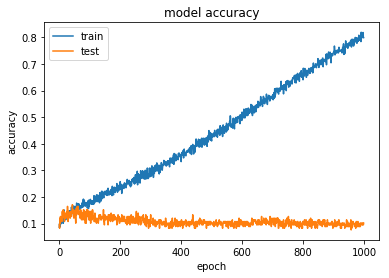

In [88]:
import matplotlib.pyplot as plt
#sigmoid
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()